# Challenge 02: Minimum Hamming Distance using a Quantum Algorithm

The Hamming distance between two binary strings (with the same number of bits) is defined as the number positions where the bits differ from each other. For example, the Hamming distance between these $6$-bit strings <span style="color:red">$0$</span>$01$<span style="color:red">$0$</span>$0$<span style="color:red">$1$</span> and <span style="color:red">$1$</span>$01$<span style="color:red">$1$</span>$0$<span style="color:red">$0$</span> is $3$.

A simple way to calculate the Hamming distance between two numbers is to perform a bitwise XOR between them, and count the number of ones in the resulting string:

$$ 001001 \oplus 101100 = 100101 \xrightarrow[]{\; \text{count ones} \;} 011 \text{ (3 in base-2)} $$

The purpose of this challenge is to develop a quantum algorithm that takes as an input an arbitrary number $m$ of $n$-bit strings, and outputs the two strings with the minimum Hamming distance between them with a resonably high probability. How high? the higher the better.

For instance, for the following input of four 4-bit strings: $[0000,1001,1100,1101]$ the algorithm should return strings $[1100,1101]$ since they only differ by one bit.

**Level 1:** Start by only considering the cases in which the answer is unique. In other words, assume that all inputs only have one pair of strings that gives the minimum Hamming distance. So inputs such as $[0000,0001,0010,0111]$ don't have to be considered because there are two solutions: $[0000,0001]$ and $[0000,0010]$.

**Level 2:** Now consider the case where more than one solution can exist and make sure the algorithm returns each of the possible solutions with equal probability. So, for the example above, the probability of measuring $[0000,0001]$ or $[0000,0010]$ should be close to $50\%$ (inputs with repeated strings should also be considered).

**Hint:** Consider looking into some of the "textbook" quantum algorithms (like Deutch-Jozsa (DJ) [1], Bernstein-Vazirani (BV) [2], Grover [3], etc.) to see if this problem can be solved with variations of these. Take for instance this pre-print [4], where a modified version of DJ was used to compute Hamming distances between two strings. Now, keep in mind that in that approach, Hamming weights were calculated using probability distributions (which require multiple runs of the algorithm), and not by amplifying states, as required by this challenge.


[1] Deutsch, David, and Richard Jozsa. "Rapid solution of problems by quantum computation." Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences 439.1907 (1992): 553-558.

[2] Bernstein, Ethan, and Umesh Vazirani. "Quantum complexity theory." SIAM Journal on computing 26.5 (1997): 1411-1473.

[3] Grover, Lov K. , "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (1996), [arXiv:quant-ph/9605043](https://arxiv.org/abs/quant-ph/9605043)

[4] Bravo, José Manuel. "Calculating Hamming distance with the IBM Q Experience." Preprints (2018).

# Level 1

Okay, so I am going to start naively again as I did with challenge-01, but intend this time to start looking at resources after getting something working.

I had many failed attempts that I'll quickly summarize.

My first attempt involved working out the hamming distance matrices for 1, 2, 3, and 4-bit bitstrings to see if I could spot any patterns. When one does this it is apparent that there are both partial triangular reflections and complements within the same matrix (I'm probably using non-standard terminology here to describe). I was then thinking to try and build a unitary matrix by hand based on this to transform inputs to the correct minimum hamming distance, but failed miserably since some of the matrices I was trying to produce were non-unitary. I know that I'm missing the math background for this approach, so this is still something I'd like to come back to.

I then went back to first principles in trying to understand how to "manufacture" desired destructive interference. I set the frame of the problem as having a superposition of inputs and wanting to cancel out some of the terms to leave terms I care about. I didn't get very far with this. I'm left wondering if Grover's algorithm is the only play in the playbook we have for amplifying desired states.

I finally decided to start working working with a QFT, QFT$\dagger$ sandwich to calculate hamming distances. After [working in Quirk experimentally](https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C1%2C%22H%22%2C%22H%22%2C%22H%22%2C1%2C%22H%22%5D%2C%5B%22QFT2%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C1%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C1%2C1%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B%22Z%5E%C2%BD%22%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B1%2C%22Z%22%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22Z%22%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B1%2C%22Z%22%2C1%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22Z%22%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B1%2C%22Z%22%2C1%2C1%2C%22%E2%97%A6%22%2C1%2C1%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22Z%22%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C%22%E2%97%A6%22%5D%2C%5B%22QFT%E2%80%A02%22%5D%5D%7D) I landed on a solution for counting, which I will code up below. I then plan to incorporate this counter into an oracle to mark the desired states and perform Grover iterations. I had so much resistance to this approach initially because I want to believe there can be a more creative approach, but alas I don't have all the time in the world to spend on this.

Number of grover iterations: 3


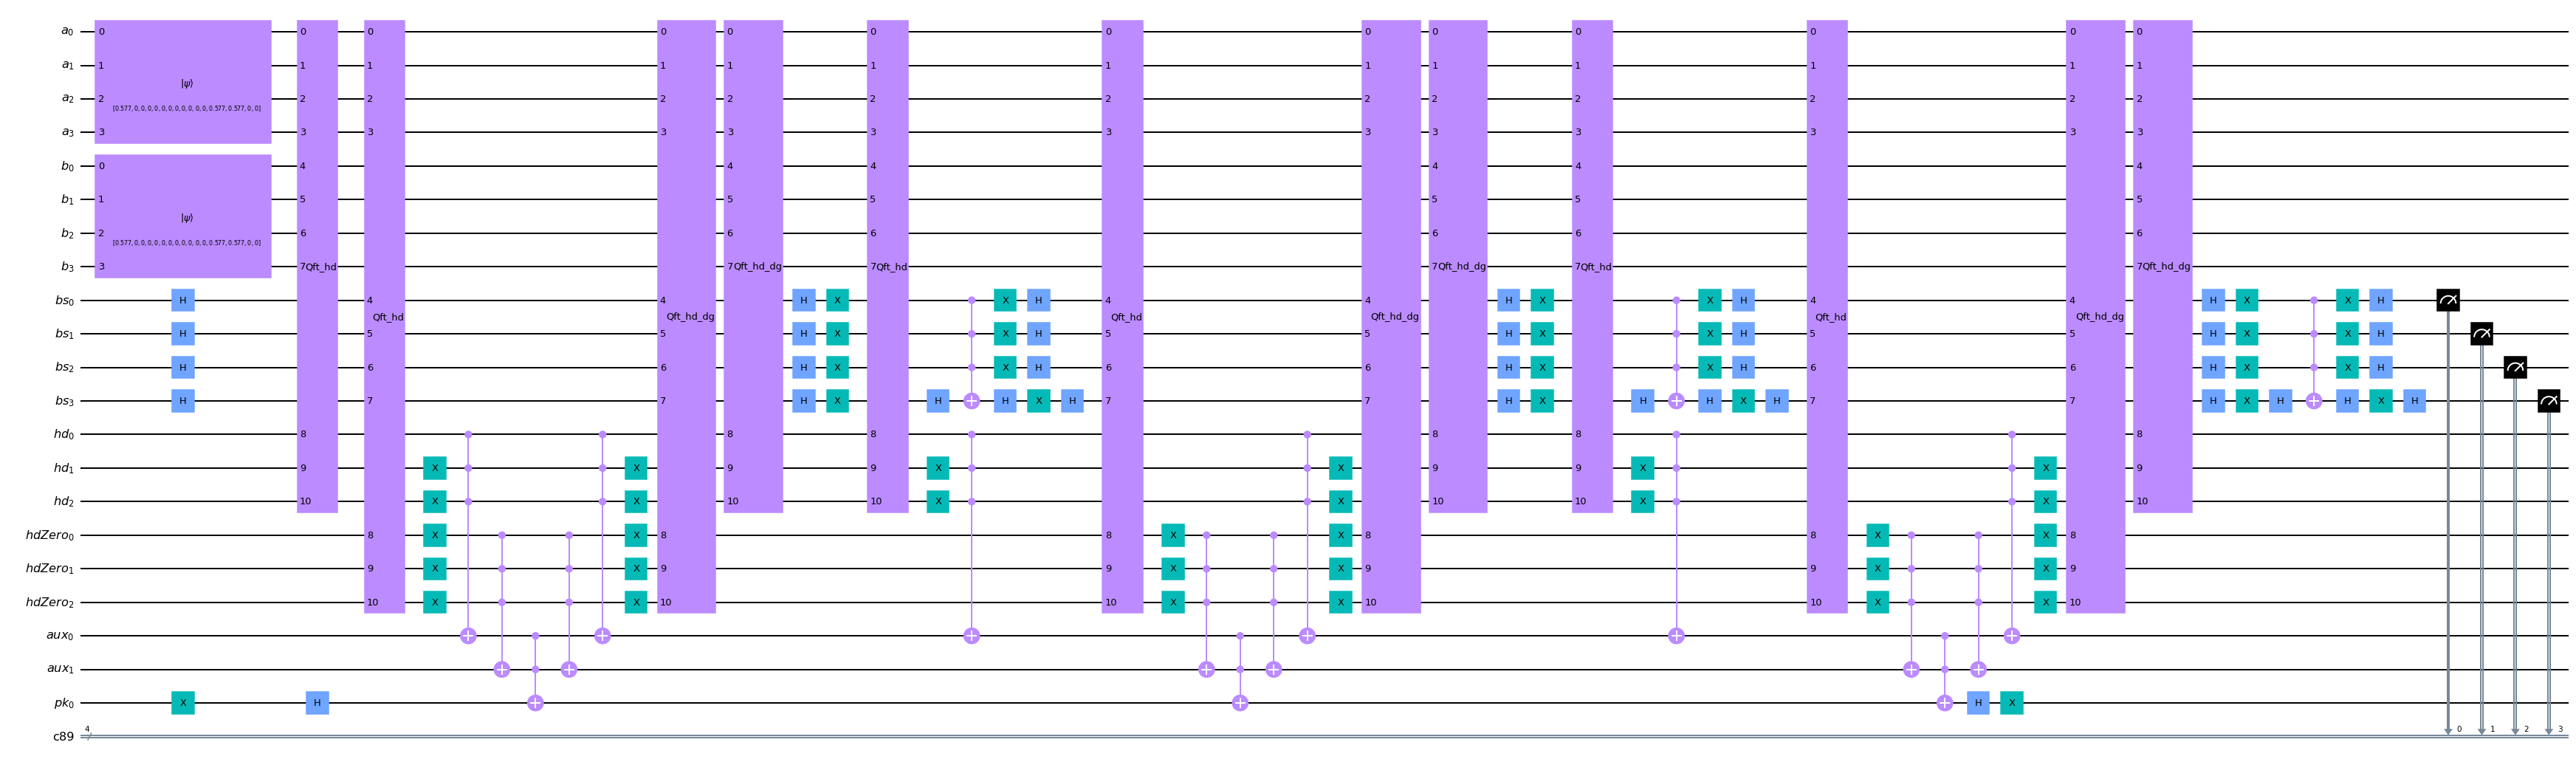

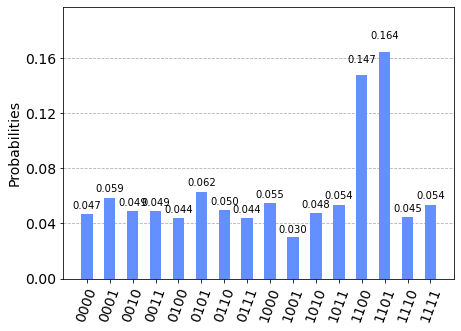

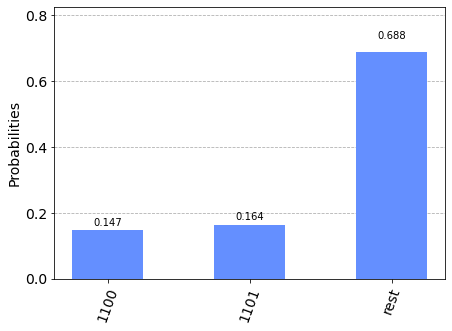

In [84]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT
from qiskit.providers.aer import QasmSimulator

def get_qft_hamming_distance_instruction(bitstring_width):
    '''
    QFTs have a structure where part of the register is counting clockwise (cw) and the other part is counting 
    counter-clockwise (ccw) modulo some number based on the total size of the register
    
    Ex: 3 qubit qft register
    |000> X - not used
    |001> counts mod 8 ccw
    |010> counts mod 4 ccw
    |011> counts mod 6 ccw
    -----
    |100> counts mod 2
    -----
    |101> counts mod 6 cw
    |110> counts mod 4 cw
    |111> counts mod 8 cw
    
    Using phase gates on specific address lines we can increment or decrement the counter
    '''
    num_qft_qubits = int(np.floor(np.log2(bitstring_width))) + 1
    opA = QuantumRegister(bitstring_width, name="a")
    opB = QuantumRegister(bitstring_width, name="b")
    hd = QuantumRegister(num_qft_qubits, name="hd") # hamming distance result
    qc = QuantumCircuit(opA, opB, hd)
    
    qft_gate = QFT(num_qft_qubits, do_swaps=False)
#     qc.append(qft_gate, hd)
    qc.h(hd) # a simple H gate is all that is needed since our default state is |0> anyway
    for i in range(num_qft_qubits):
        # Check bit by bit across both bitstrings
        for q in range(opA.size):
            # Case: A:0 B:1
            qc.x(opA[q])            
            qc.mcp(np.pi/2**(num_qft_qubits - i - 1), [opA[q], opB[q]], hd[i])
            qc.x(opA[q])

            # Case: A:1 B:0
            qc.x(opB[q])
            qc.mcp(np.pi/2**(num_qft_qubits - i - 1), [opA[q], opB[q]], hd[i])
            qc.x(opB[q])        

    qft_gate_inv = qft_gate.inverse()
    qc.append(qft_gate_inv, hd)

    for i in range(int(np.floor(num_qft_qubits/2))):
        qc.swap(hd[i], hd[num_qft_qubits-i-1])
        
    instruction = qc.to_instruction()
    instruction.name = "qft_hd"
    return instruction, opA, opB, hd

n = 4
qft_hd, bsA, bsB, hd = get_qft_hamming_distance_instruction(n)
aux = QuantumRegister(2, name='aux')
pk = QuantumRegister(1, name='pk')
bs = QuantumRegister(len(bsA), name='bs')
hdZero = QuantumRegister(len(hd), name='hdZero')
cr = ClassicalRegister(len(bsA))
qc = QuantumCircuit(bsA, bsB, bs, hd, hdZero, aux, pk, cr)

# I wanted to try solving this without a qram, so went an approach of using superposition for each operand
# instructions above include '1001', but this actually would give two solutions for hd=1: ['1001', '1101'] and ['1100', '1101']
input_data = [[0, 0, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1]]

sv = None
for d in input_data:
    bitstring = ''.join(map(str, d))
    if sv is None:
        sv = qi.Statevector.from_label(bitstring)
    else:
        sv += qi.Statevector.from_label(bitstring)
sv /= np.sqrt(len(input_data))
qc.initialize(sv.data, bsA[:])
qc.initialize(sv.data, bsB[:])

# Utilize a superposition of all bitstrings in order to use grover diffusion, but we will constrain to the actual 
# bitstrings when marking solution states by entangling with one operand
qc.h(bs)

# phase kickback initialization
qc.x(pk)
qc.h(pk)

qft_hd_inv = qft_hd.inverse()

num_grover_iterations = int(np.floor(np.pi*np.sqrt(2**len(bs))/4)) # x2 because we have
print(f'Number of grover iterations: {num_grover_iterations}')

for j in range(num_grover_iterations):
# oracle        
    qc.append(qft_hd, bsA[:] + bsB[:] + hd[:])
    qc.append(qft_hd, bsA[:] + bs[:] + hdZero[:])
    
    # hd=1
    qc.x(hd[1:])
    qc.mct(hd[:], aux[0])
    
    # match/entangle bitstring in 'bs' register (i.e. hamming distance of 0)
    qc.x(hdZero)
    qc.mct(hdZero[:], aux[1])
    
    qc.mct(aux[0:2], pk)

    #uncompute
    qc.mct(hdZero[:], aux[1])
    qc.x(hdZero)

    qc.mct(hd[:], aux[0])
    qc.x(hd[1:])
            
    qc.append(qft_hd_inv, bsA[:] + bs[:] + hdZero[:])
    qc.append(qft_hd_inv, bsA[:] + bsB[:] + hd[:])

# diffusion
    qc.h(bs)
    qc.x(bs)
    
    qc.h(bs[-1])
    qc.mct(bs[:-1], bs[-1])
    qc.h(bs[-1])
    
    qc.x(bs)
    qc.h(bs)

qc.h(pk)
qc.x(pk)

qc.measure(bs, cr)
display(qc.draw(output='mpl', fold=-1))

# backend = Aer.get_backend('qasm_simulator')
backend = QasmSimulator(precision="single")
shots = 1024
results = execute(qc, backend=backend, shots=shots, optimization_level=3).result()
display(plot_histogram(results.get_counts())) 
display(plot_histogram(results.get_counts(), number_to_keep=2))

The above is a correct solution for a hamming distance of 1

# Level 2

For a more general solution, I went the route of using a qram to allow multiples of the same bitstring. However, I think it would still work to encode the frequency of bitstrings in the actual probability amplitudes of a superposition. The only thing I didn't work out completely was how to find a minimum hamming distance across bitstrings at increasing hamming distances. For example, if there are no bitstrings with a hamming distance of 1, then I figured the whole operation could be performed again with a search for hamming distance of 2 and so on.

Loading qram:
[0, 0, 0, 0]
[1, 0, 0, 1]
[1, 1, 0, 0]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 0, 1]
Number of grover iterations: 2


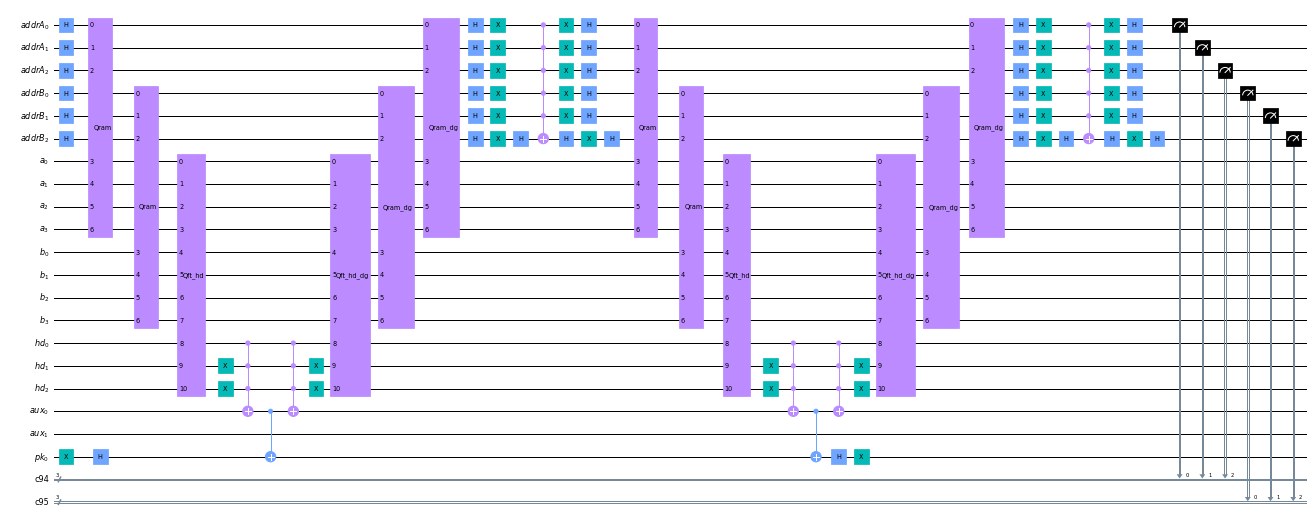

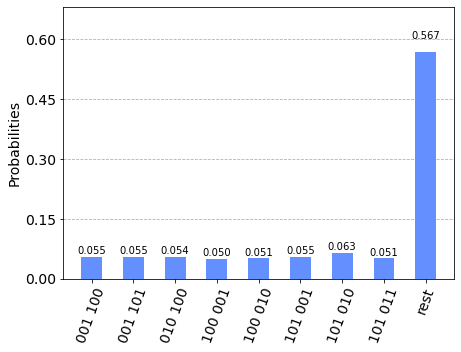

In [88]:
def bitfield(n, max_bits):    
    return [int(digit) for digit in f'{{0:0{max_bits}b}}'.format(n)]

def get_qram_instruction(bitstrings):
    data = QuantumRegister(len(bitstrings[0]))
    address = QuantumRegister(np.ceil(np.log2(len(bitstrings))))
    qc = QuantumCircuit(address,data)

    print("Loading qram:")
    for b, bs in enumerate(bitstrings):
        print(bs)
        # reversed to match little endian in qiskit
        for i, a in enumerate(reversed(bitfield(b, len(address)))):
            if not a:
                qc.x(address[i])
        for i, l in enumerate(reversed(bs)):        
            if l:
                qc.mct(address[:], data[i])
        for i, a in enumerate(reversed(bitfield(b, len(address)))):
            if not a:
                qc.x(address[i])
        instruction = qc.to_instruction()
        instruction.name = "qram"
    return instruction, data, address

# input_data = [[0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 0, 1]]
# input_data = [[0, 0, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1]]
input_data = [[0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1]]
# input_data = [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 1, 1]]
# input_data = [[0, 0, 0, 0], [1, 1, 0, 1], [1, 0, 1, 0]] # no hd=1 solution

qft_hd, bsA, bsB, hd = get_qft_hamming_distance_instruction(len(input_data[0]))
qram, data, address = get_qram_instruction(input_data)
addrA = QuantumRegister(len(address), name='addrA')
addrB = QuantumRegister(len(address), name='addrB')
aux = QuantumRegister(2, name='aux')
pk = QuantumRegister(1, name='pk')
crAddrA = ClassicalRegister(len(addrA))
crAddrB = ClassicalRegister(len(addrB))
qc = QuantumCircuit(addrA, addrB, bsA, bsB, hd, aux, pk, crAddrA, crAddrB)

num_grover_iterations = int(np.floor(np.pi*np.sqrt(2**len(address))/4))
print(f'Number of grover iterations: {num_grover_iterations}')

qc.h(addrA)
qc.h(addrB)

# phase kickback initialization
qc.x(pk)
qc.h(pk)

qram_inv = qram.inverse()
qft_hd_inv = qft_hd.inverse()

for j in range(num_grover_iterations):
# oracle
    qc.append(qram, addrA[:] + bsA[:])
    qc.append(qram, addrB[:] + bsB[:])
    qc.append(qft_hd, bsA[:] + bsB[:] + hd[:])
    
    # hd=1
    qc.x(hd[1:])
    qc.mct(hd[:], aux[0])
    
    qc.cx(aux[0], pk)

    #uncompute
    qc.mct(hd[:], aux[0])
    qc.x(hd[1:])
            
    qc.append(qft_hd_inv, bsA[:] + bsB[:] + hd[:])        
    qc.append(qram_inv, addrB[:] + bsB[:])
    qc.append(qram_inv, addrA[:] + bsA[:])

# diffusion
    qc.h(addrA[:])
    qc.x(addrA[:])
    qc.h(addrB[:])
    qc.x(addrB[:])

    qc.h(addrB[-1])
    qc.mct(addrA[:] + addrB[:-1], addrB[-1])
    qc.h(addrB[-1])
    
    qc.x(addrB[:])
    qc.h(addrB[:])        
    qc.x(addrA[:])
    qc.h(addrA[:])        

qc.h(pk)
qc.x(pk)

qc.measure(addrA, crAddrA)
qc.measure(addrB, crAddrB)
display(qc.draw(output='mpl', scale=0.5, fold=-1))

# backend = Aer.get_backend('qasm_simulator')
backend = QasmSimulator(precision="single")
shots = 1024
results = execute(qc, backend=backend, shots=shots, optimization_level=3).result()
display(plot_histogram(results.get_counts(), number_to_keep=8))

Okay, so we have results, but these are address registers and we have duplicate pairings that need to be resolved (e.g. ['010','100'] and ['100','010']). Let's postprocess.

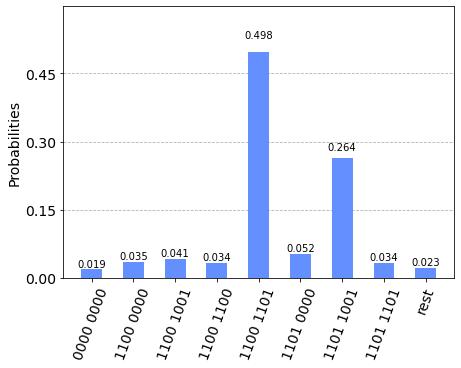

In [90]:
def postprocess_results(counts, data):
    final_counts = {}
    max_address = len(data) - 1
    for key, c in counts.items():
        addresses = key.split(' ')
        addresses[0] = int(addresses[0], 2)
        addresses[1] = int(addresses[1], 2)
        
        if addresses[0] > max_address or addresses[1] > max_address:
            continue
        
        bsA = ''.join(map(str, data[addresses[0]]))
        bsB = ''.join(map(str, data[addresses[1]]))
        bs_key = f'{bsA} {bsB}'
        bs_swapped_key = f'{bsB} {bsA}'                
        
        if bs_swapped_key in final_counts.keys():
            final_counts[bs_swapped_key] += c
        elif bs_key in final_counts.keys():
            final_counts[bs_key] += c
        else:
            final_counts[bs_key] = c
        
    return final_counts

counts = postprocess_results(results.get_counts(), input_data)
sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
plot_histogram(sorted_counts, number_to_keep=8)

As you can see above the difference in probabilities of the two solutions reflects the frequency of the bitstrings in the input data.